# Summary

Base model's ROC-AUC is 86.47%, while Lale's ROC-AUC is 84.43%. Lale did not perform better than base Random Forest.

[Iale](https://lale.readthedocs.io/en/latest/index.html) is an AutoML tool developed by IBM


In [3]:
import pandas as pd
# import preprocessed data
X_train = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/datasets/X_train.csv')
y_train = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/datasets/y_train.csv')
X_test = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/datasets/X_test.csv')
y_test = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/datasets/y_test.csv')
X_val = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/datasets/X_val.csv')
y_val = pd.read_csv('/Users/chiaralu/Desktop/Courses/INSY 695/Group Project/hotel_cancellation_ML2/datasets/y_val.csv')

In [4]:
pip install lale

DEPRECATION: Loading egg at /Applications/anaconda3/lib/python3.11/site-packages/autofolio-2.1.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [5]:
import lale.datasets.openml
import lale.helpers
from lale.lib.lale import AutoPipeline

In [12]:
# Initiate autopipeline
trainable = AutoPipeline(prediction_type='classification', scoring = 'roc_auc', 
                         max_opt_time=200, verbose = True, max_evals = 5)
trained = trainable.fit(X_train, y_train)
predicted = trained.predict(X_test)


/Applications/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Applications/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


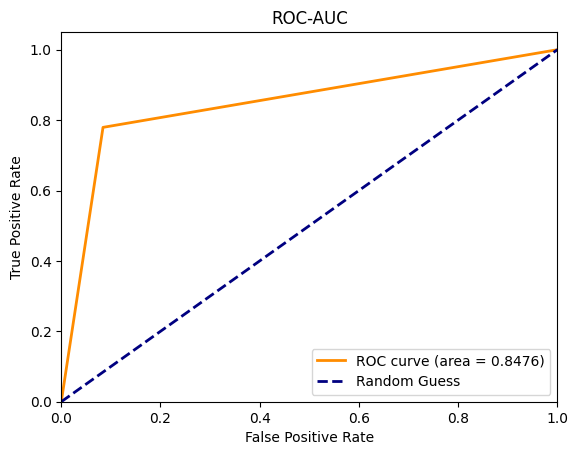

In [14]:
from sklearn.metrics import auc, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, predicted)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC')
plt.legend(loc="lower right")
plt.show()


In [18]:
auc_roc = roc_auc_score(y_test, predicted)
print("Lale AutoML AUC-ROC Score:", auc_roc)

Lale AutoML AUC-ROC Score: 0.8476390022391027


In [19]:
trained.summary()


,loss,time,log_loss,status
name,,,,
gbt_all,-0.936523,23.851771,0.299918,ok
gbt_num,-0.936398,13.161586,0.300162,ok
dummy,-0.500000,0.008307,0.661006,ok


In [23]:
# print best pipeline
import lale.pretty_print
trained.pretty_print(ipython_display=True)


```python
from lale.lib.lale import AutoPipeline
import lale

lale.wrap_imported_operators()
pipeline = AutoPipeline(
    scoring="roc_auc", max_opt_time=200, verbose=True, max_evals=5
)
```

DEPRECATION: Loading egg at /Applications/anaconda3/lib/python3.11/site-packages/autofolio-2.1.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [41]:
# save the best pipeline
import json

# Assuming trained is your best trained Lale pipeline
best_pipeline_json = trained.to_json()

# Print best pipeline
print(best_pipeline_json)

# Save best pipeline to a file
with open('Lale_pipeline.json', 'w') as f:
    json.dump(best_pipeline_json, f)


{'class': 'lale.lib.lale.auto_pipeline._AutoPipelineImpl', 'state': 'trained', 'operator': 'AutoPipeline', 'label': 'AutoPipeline', 'documentation_url': 'https://lale.readthedocs.io/en/latest/modules/lale.lib.lale.auto_pipeline.html', 'hyperparams': {'scoring': 'roc_auc', 'max_opt_time': 200, 'verbose': True, 'max_evals': 5}, 'is_frozen_trainable': True, 'coefs': 'coefs_not_available', 'is_frozen_trained': False}
